(content:texat-track-fitting)=
# Track Fitting

In [31]:
import pickle
from pathlib import Path

import awkward as ak
import mplhep as hep
import numpy as np
import vector
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.patches import Polygon
from texat.utils.awkward.convert import from_hdf5
from texat.utils.awkward.structure import ordered_map

hep.style.use(hep.style.ATLAS)

## Track Multiplicity

In {ref}`content:facility-location-problem`, the PeARL method for multi-model discovery and fitting was discussed. For this experiment, a random sample of 1024 models was drawn from pairwise combinations of the clusters computed in {ref}`content:cluster-reconstruction`. Each model comprised of a pair of clusters, with corresponding positions and charges, and assigned a characteristic width drawn from a Gaussian distribution whose width was determined by inspection. {numref}`track-multiplicity-fit` shows the track multiplicity of these fits, i.e. the number of tracks per event. Perfect scattering reactions correspond to three-track events, in which the beam, light product recoil, and heavy reactant scatter are observed. However, these events are in the minority; many scattering reactions will happen such that the beam track is not observed, or the light product track is missed. As such, the majority of events are <3 track events. Beyond three track events correspond to coherent noise, which is reconstructed as ghost tracks, or pileup, in which there are demonstrably greater than three tracks present in the event.

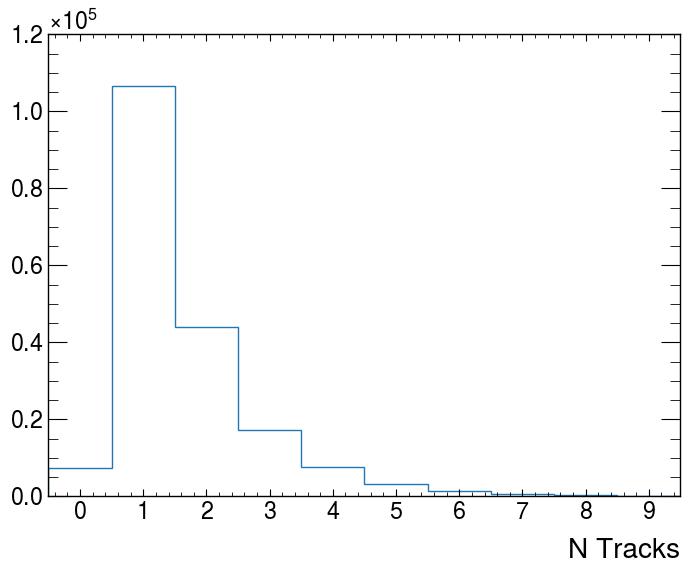

In [2]:
with open("data/track-multiplicity.pickle", "rb") as f:
    hist_mul = pickle.load(f)


hist_mul.plot();

These track fits are unconstrained; in the preliminary fitting procedure there is no imposition of reaction kinematics upon the result. Though it might seem prudent to pursue only those solutions which satisfy kinematic constraints, at this early juncture in the analysis there is insufficient information to introduce these constraints; in order to apply the rules of energy and momentum conservation, each track must be identified in terms of the particle kind, and the reaction to which it belongs. This requires that the fitting process be diphasic; a primary track finding routine, followed by a kinematic fitting procedure (see {ref}`content:kinematic-fitting`).

## Silicon Projection

For each event, with the trigger placed upon the silicon detector channels, it follows that there should be a track associated with a low-z ion incident upon the detector. Therefore, one can establish a 2D histogram corresponding to the projection of these tracks upon the triggered silicon detector. Without any gating logic, it should follow that the these intersections agree closely to the known geometrical dimensions of each quadrant. {numref}`silicon-hitmap-forward` shows a pair of hitmaps for the forward silicon detector array. Due to the high incidence of proton tracks in the central region, it is necessary to ignore the central detectors in order to best visualise the quality of the hitmap in other regions. A plot of the _relative_ hitmap formed by taking the difference of the reconstructed hit position with the known silicon centroid is shown in {numref}`silicon-hitmap-forward-relative` to have good agreement with the quadrant dimensions. It is expected that the agreement will not be exact; small tracks incur a larger angular error, which manifests as significant displacements in the reconstructed hit position. In both figures, the hitmap is formed by the union of all track intersections in order to remove bias from gating the track hit position. A position gate was applied to the track endpoint; tracks whose endpoints lie within the final sector of the MicroMeGaS are likely to be the light particles that reach the silicon; the beam and scattered beam tracks are typically found earlier in the detector.

:::{warning} Describe why so many quadrants are poor
:::

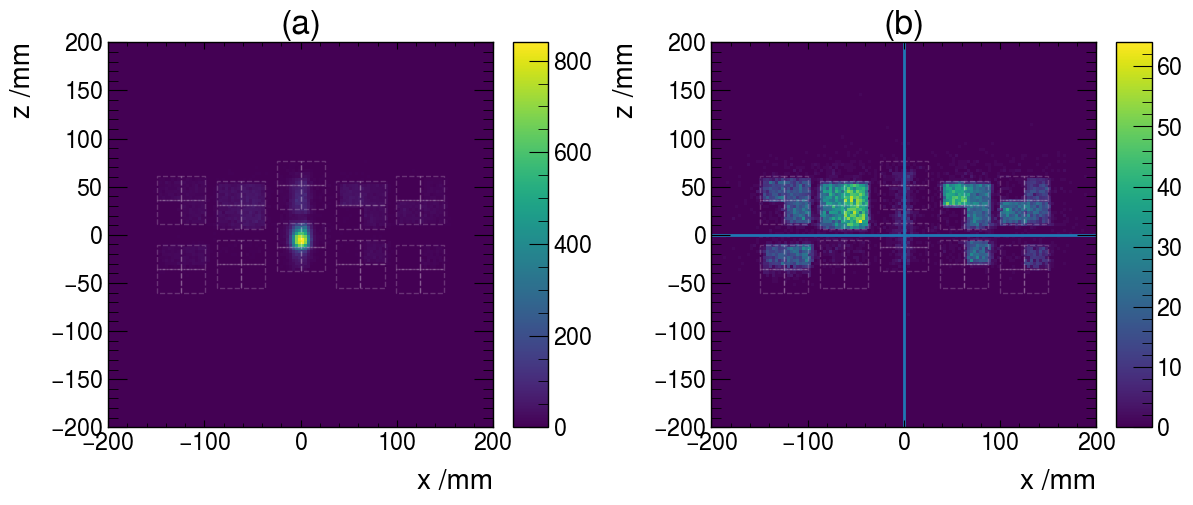

In [36]:
calibration_map_path_local = Path("data", "calibration.h5")

quadrant_table = from_hdf5(calibration_map_path_local)
quadrant_map = ordered_map(
    quadrant_table.addr.index.chan, quadrant_table[["position", "coefficient"]]
)
forward_quadrant_position = quadrant_map.value.position[
    quadrant_map.value.position.x < 160
]

vertices = (
    forward_quadrant_position[:, np.newaxis]
    + vector.zip(dict(x=[-1, -1, 1, 1], y=0, z=[-1, 1, 1, -1]))[np.newaxis, :] * 12.5
)
vert = ak.concatenate(
    (vertices.x[..., np.newaxis], vertices.z[..., np.newaxis]), axis=-1
)

with open("data/forward-hit-map.pickle", "rb") as f:
    forward_hit_map_hist = pickle.load(f)
with open("data/forward-hit-map-non-central.pickle", "rb") as f:
    forward_hit_map_non_central_hist = pickle.load(f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
forward_hit_map_hist.plot(ax=ax1)
forward_hit_map_non_central_hist.plot(ax=ax2)

ax1.add_collection(
    PolyCollection(
        vert, edgecolors="white", facecolors="none", linestyle="--", alpha=0.2
    )
)
ax2.add_collection(
    PolyCollection(
        vert, edgecolors="white", facecolors="none", linestyle="--", alpha=0.2
    )
)
ax1.set_aspect(1)
ax1.set_title("(a)")
ax2.set_aspect(1)
ax2.set_title("(b)")
plt.axhline(0)
plt.axvline(0);

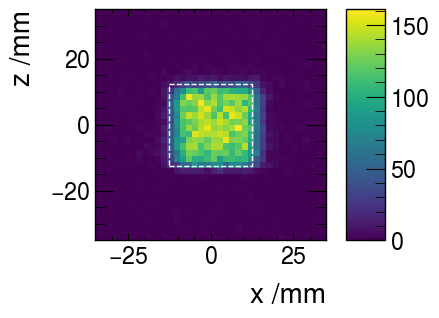

In [47]:
with open("data/forward-relative-hit-map.pickle", "rb") as f:
    forward_relative_hit_map_hist = pickle.load(f)

fig, ax = plt.subplots(figsize=(7, 3))
forward_relative_hit_map_hist.plot(ax=ax)
ax.set_aspect(1)
ax.add_patch(
    Polygon(
        np.asarray([[-12.5, -12.5], [12.5, -12.5], [12.5, 12.5], [-12.5, 12.5]]),
        edgecolor="white",
        facecolor="none",
        linestyle="--",
    )
)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
ax.set_aspect(1);